### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

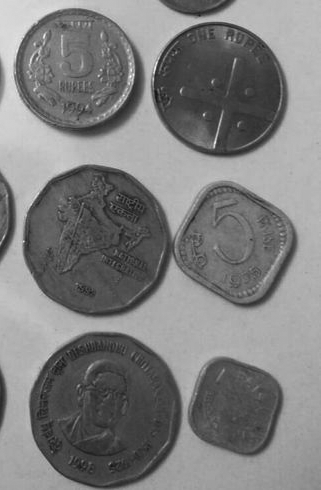

In [2]:
coins = cv2.imread('../dane1-4/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

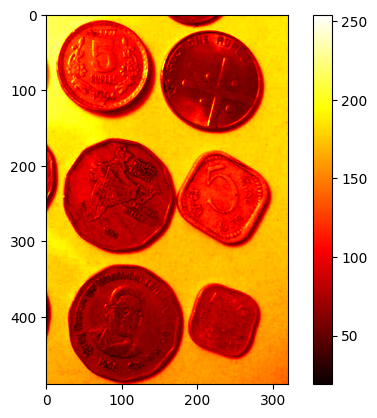

In [5]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

plt.colorbar()

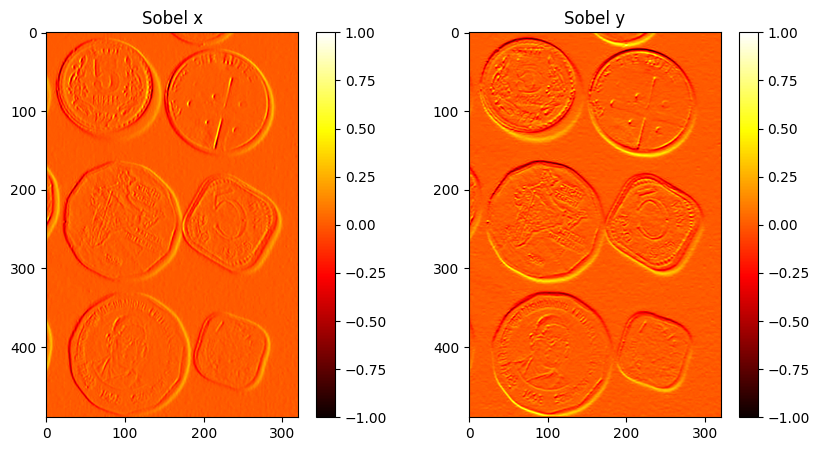

In [6]:
coins_sobel_x = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=3)
coins_sobel_y = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=3)

coins_sobel_x = coins_sobel_x / np.max(np.abs(coins_sobel_x))
coins_sobel_y = coins_sobel_y / np.max(np.abs(coins_sobel_y))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im0 = axs[0].imshow(coins_sobel_x, cmap='hot', vmin=-1, vmax=1)
axs[0].set_title('Sobel x')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(coins_sobel_y, cmap='hot', vmin=-1, vmax=1)
axs[1].set_title('Sobel y')
fig.colorbar(im1, ax=axs[1])

plt.show()

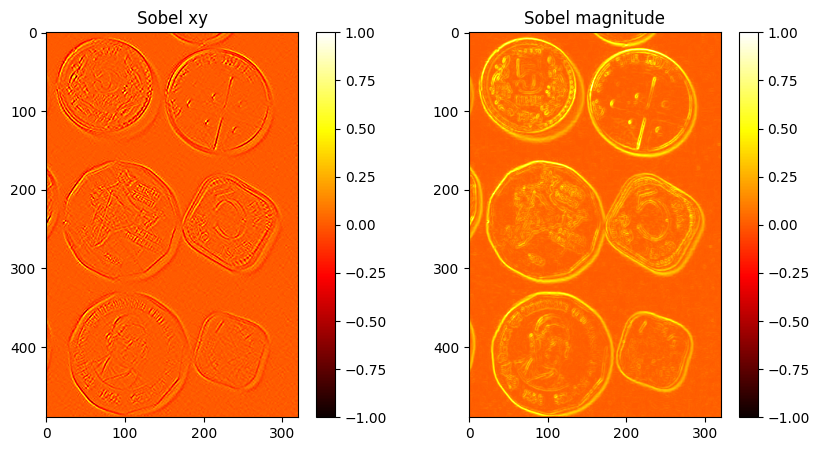

In [13]:
coins_sobel_xy = cv2.Sobel(coins, cv2.CV_64F, 1, 1, ksize=3)
coins_sobel_magnitude = cv2.magnitude(coins_sobel_x, coins_sobel_y)

coins_sobel_xy = coins_sobel_xy / np.max(np.abs(coins_sobel_xy))
coins_sobel_magnitude = coins_sobel_magnitude / np.max(np.abs(coins_sobel_magnitude))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im0 = axs[0].imshow(coins_sobel_xy, cmap='hot', vmin=-1, vmax=1)
axs[0].set_title('Sobel xy')
fig.colorbar(im0, ax=axs[0])

# im1 = axs[1].imshow(coins_sobel_magnitude, cmap='hot', vmin=0, vmax=1)
im1 = axs[1].imshow(coins_sobel_magnitude, cmap='hot', vmin=-1, vmax=1)
axs[1].set_title('Sobel magnitude')
fig.colorbar(im1, ax=axs[1])

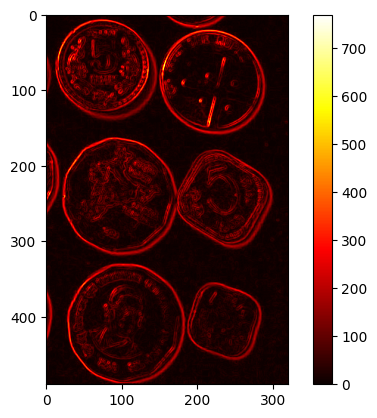

In [19]:
sobel_x = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=3)

sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_angle = cv2.phase(sobel_x, sobel_y, angleInDegrees=True)

plt.imshow(sobel_magnitude, cmap='hot')
plt.colorbar()



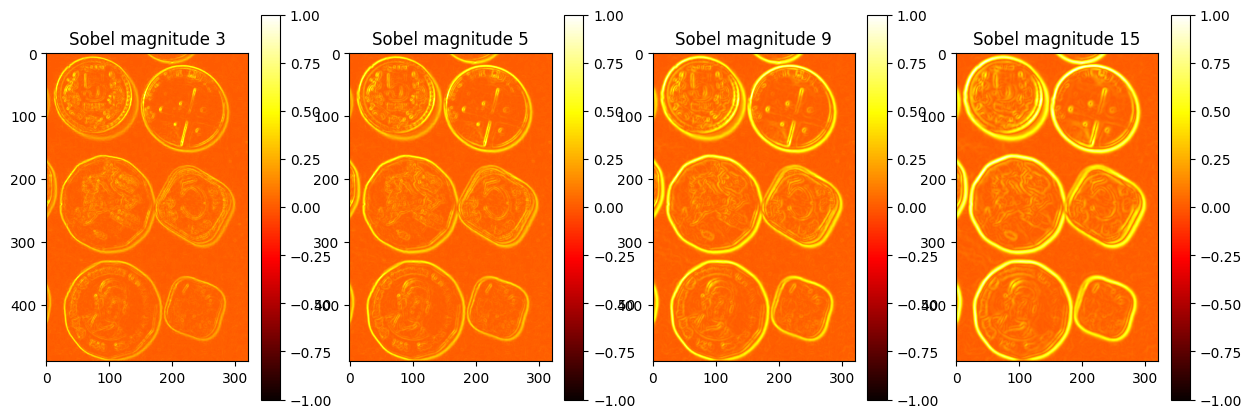

In [26]:
kernel_sizes = [3, 5, 9, 15]

fig, axs = plt.subplots(1, len(kernel_sizes), figsize=(15, 5))

for i, kernel_size in enumerate(kernel_sizes):
    sobel_x = cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobel_y = cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=kernel_size)
    sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
    sobel_magnitude = sobel_magnitude / np.max(np.abs(sobel_magnitude))

    im = axs[i].imshow(sobel_magnitude, cmap='hot', vmin=-1, vmax=1)
    axs[i].set_title(f'Sobel magnitude {kernel_size}')
    fig.colorbar(im, ax=axs[i])


---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

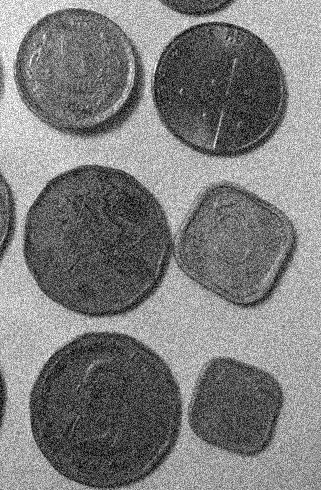

In [27]:
coins_noise = cv2.imread('../dane1-4/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

Text(0.5, 1.0, 'Canny 350, 400')

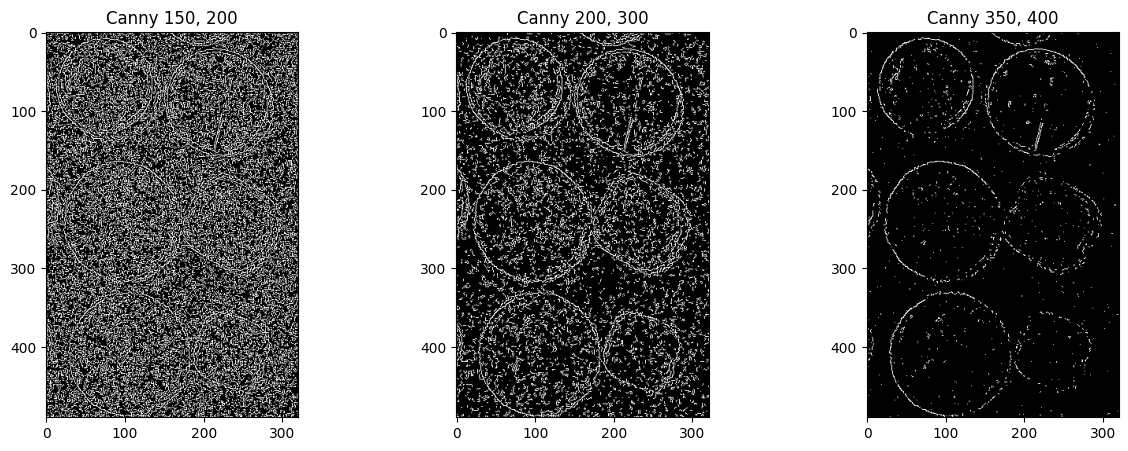

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

high_thresh = 200
low_thresh = 150
edges = cv2.Canny(coins_noise, low_thresh, high_thresh)

im0 = axs[0].imshow(edges, cmap='gray')
axs[0].set_title(f'Canny {low_thresh}, {high_thresh}')


high_thresh = 300
low_thresh = 200
edges = cv2.Canny(coins_noise, low_thresh, high_thresh)

im2 = axs[1].imshow(edges, cmap='gray')
axs[1].set_title(f'Canny {low_thresh}, {high_thresh}')

high_thresh = 400
low_thresh = 350
edges = cv2.Canny(coins_noise, low_thresh, high_thresh)

im1 = axs[2].imshow(edges, cmap='gray')
axs[2].set_title(f'Canny {low_thresh}, {high_thresh}')

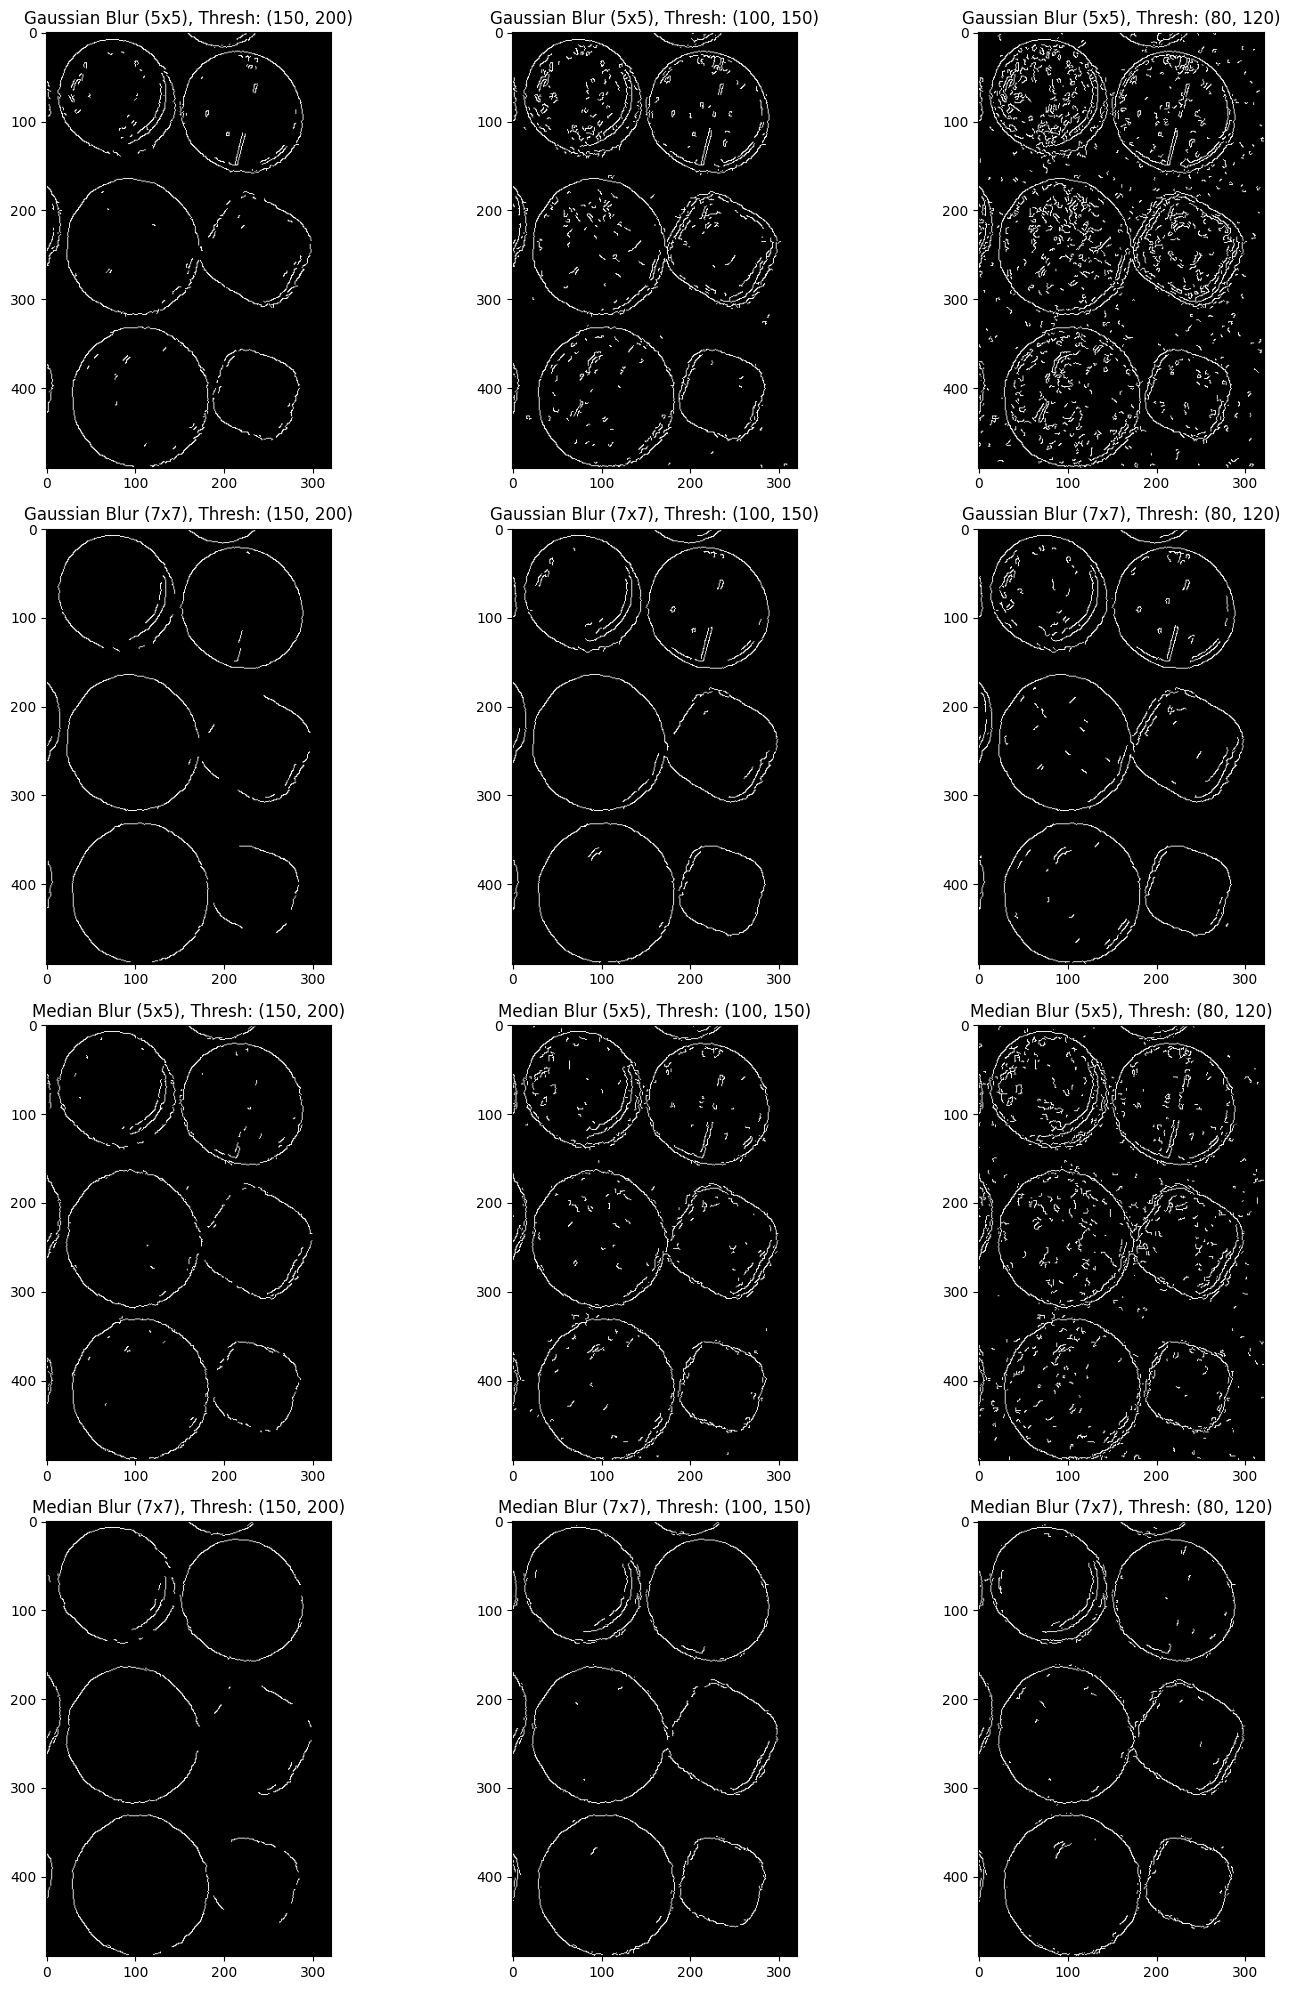

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

blur_functions = {
    'Gaussian Blur (5x5)': lambda x: cv2.GaussianBlur(x, (5, 5), 0),
    'Gaussian Blur (7x7)': lambda x: cv2.GaussianBlur(x, (7, 7), 0),
    'Median Blur (5x5)': lambda x: cv2.medianBlur(x, 5),
    'Median Blur (7x7)': lambda x: cv2.medianBlur(x, 7),
}

trh_canny = [
    (150, 200),
    (100, 150),
    (80, 120),
]

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for i, (name, blur) in enumerate(blur_functions.items()):
    for j, trh in enumerate(trh_canny):
        axs[i, j].imshow(cv2.Canny(blur(coins_noise), trh[0], trh[1]), cmap='gray')
        axs[i, j].set_title(f'{name}, Thresh: {trh}')

plt.tight_layout()
plt.show()

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

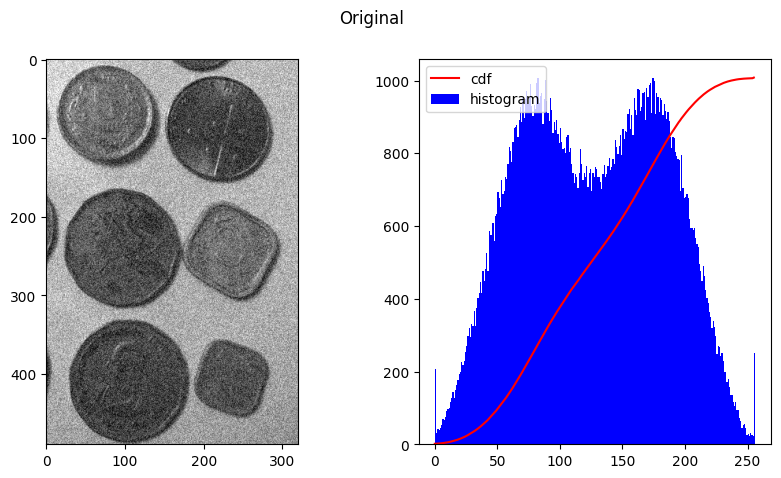

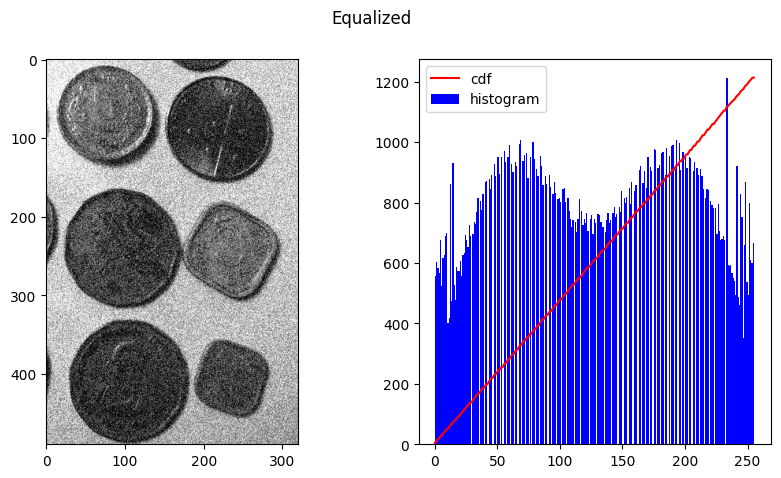

In [46]:
import math
import numpy as np

coins_noise = cv2.imread('../dane1-4/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)

def hist_eq(img):
    hist, _ = np.histogram(img.flatten(), 256, [0, 256])
    cdf = np.cumsum(hist / np.sum(hist))
    cdf = np.array([math.floor(x * 255) for x in cdf])
    # calculating the matrix of intensivity
    return cdf[img], cdf

def plot_hist(img, title):
    
    fig, (a1, a2) = plt.subplots(1, 2, figsize=(10, 5))

    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    a1.imshow(img, cmap='gray')

    cdf = np.cumsum( hist / np.sum(hist) )

    a2.hist(img.flatten(), 256, [0, 256], color = 'b')

    a2.plot(cdf * np.max(hist), color = 'r')
    plt.legend(('cdf', 'histogram'), loc = 'upper left')
    fig.suptitle(title)
    plt.show()

coins_noise_eq, cdf_func = hist_eq(coins_noise)

plot_hist(coins_noise, 'Original')
plot_hist(coins_noise_eq, 'Equalized')

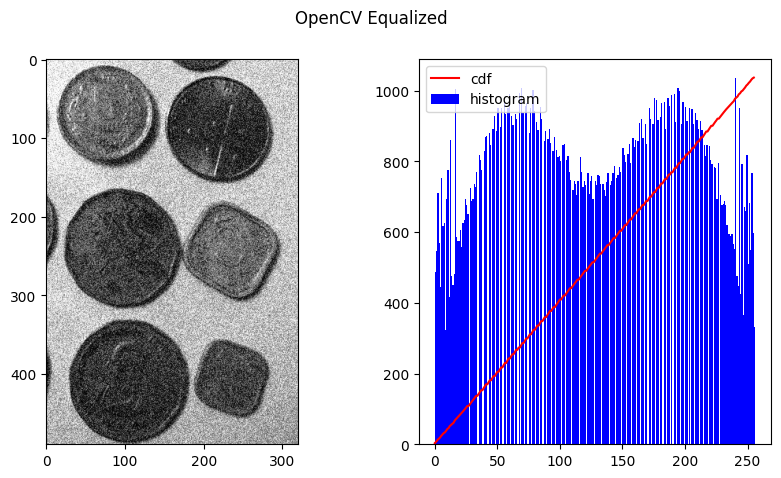

In [52]:
coins_eq = cv2.equalizeHist(coins_noise)

plot_hist(coins_eq, 'OpenCV Equalized')

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

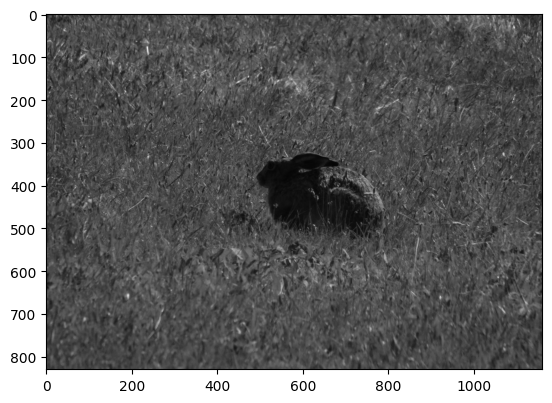

In [53]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(hare_gray, cmap='gray')

Rozwiązanie:

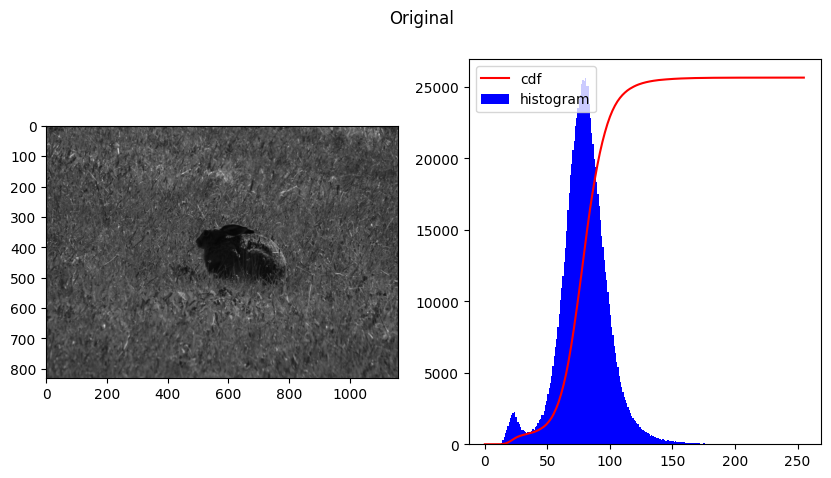

Text(0.5, 1.0, 'Otsu')

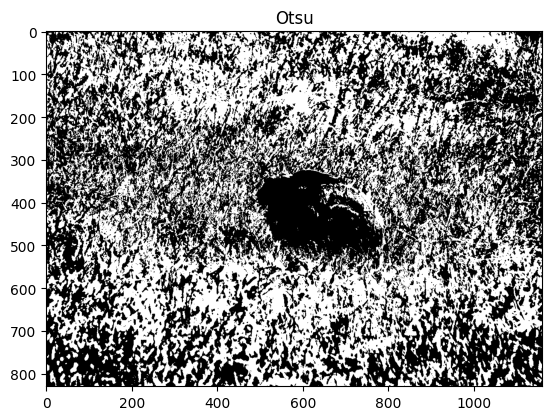

In [54]:
plot_hist(hare_gray, 'Original')

_, otsu = cv2.threshold(hare_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.title('Otsu')

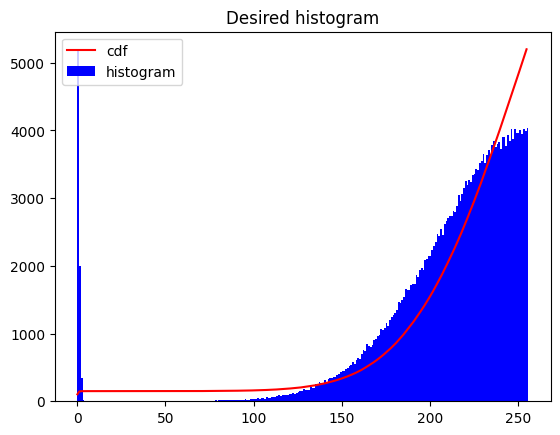

In [55]:
# desired histogram it is a gaussian mixture with 2 components with means 20 and 200 and std 20 and 20
desired_hist = np.concatenate([np.random.normal(0, 1, 15000), np.random.normal(255, 50, 500000)])
hist, bins = np.histogram(desired_hist, 256, [0, 256])
plt.hist(desired_hist, 256, [0, 256], color = 'b')

cdf = np.cumsum(hist / np.sum(hist))
plt.plot(cdf * np.max(hist), color = 'r')
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Desired histogram')
plt.show()


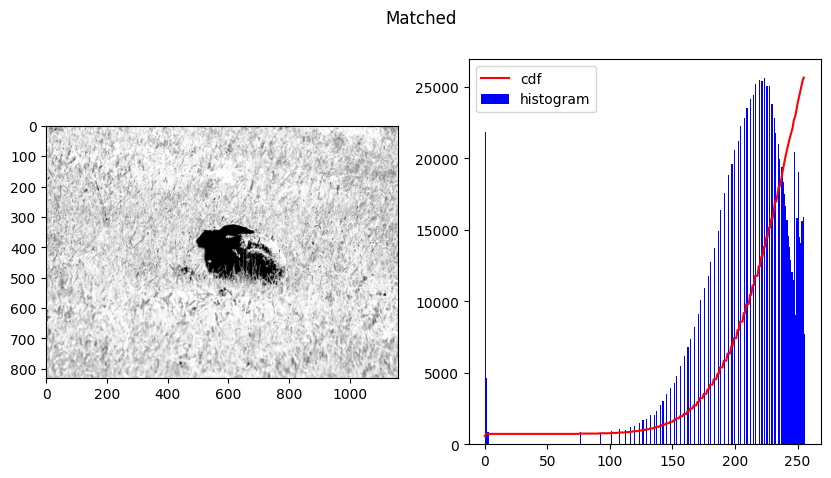

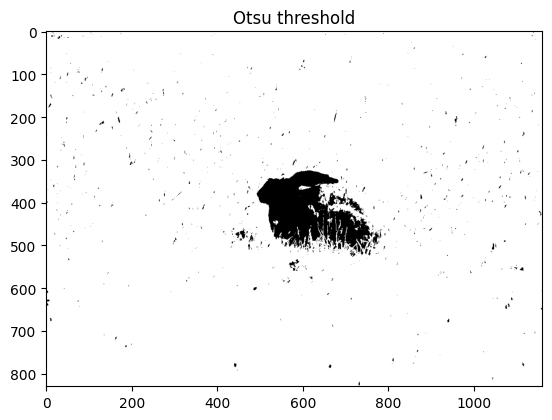

In [56]:
def hist_match(img, desired_hist):
    img_hist, _ = np.histogram(img.flatten(), 256, [0, 256])
    img_cdf = np.cumsum(img_hist / np.sum(img_hist))

    desired_cdf = np.cumsum(desired_hist / np.sum(desired_hist))

    mapping = np.zeros(256, dtype=np.uint8)

    for i in range(256):
        #eg we have pixel=0 we are looging for the closest distribution in culmulative distribution function of desired histogram

        mapping[i] = np.argmin(np.abs(desired_cdf - img_cdf[i]))

    # return mapping[img], mapping
    return cv2.LUT(img, mapping), (mapping, desired_cdf)

hare_gray_matched, _ = hist_match(hare_gray, hist)

plot_hist(hare_gray_matched, 'Matched')


T, here_treshold = cv2.threshold(hare_gray_matched, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(here_treshold, cmap='gray')
plt.title('Otsu threshold')
plt.show()


In [160]:
import numpy as np

desired_hits = [
    np.concatenate([np.random.normal(0, 1, 18000), np.random.normal(255, 35, 750000)]),
    np.concatenate([np.random.uniform(0, 2, 100000), np.random.normal(255, 35, 9500000)]),
    np.concatenate([np.random.uniform(0, 2, 100000), np.random.uniform(220, 255, 10000000)]),  # Distribution 4
    np.concatenate([np.random.normal(0, 1, 12000), np.random.exponential(scale=200, size=1000000) + 180]),  # Distribution 5 
    np.concatenate([np.random.normal(0, 1, 30000), np.random.lognormal(mean=5, sigma=1, size=1500000) + 140]),  # Distribution 6
    np.concatenate([np.random.poisson(0, 100000), np.random.poisson(255, 6600000)]),  # Distribution 6
]

# Optional: Print the shape of each distribution to confirm their sizes
for i, dist in enumerate(desired_hits):
    print(f'Distribution {i+1} shape: {dist.shape}')


Distribution 1 shape: (768000,)
Distribution 2 shape: (9600000,)
Distribution 3 shape: (10100000,)
Distribution 4 shape: (1012000,)
Distribution 5 shape: (1530000,)
Distribution 6 shape: (6700000,)


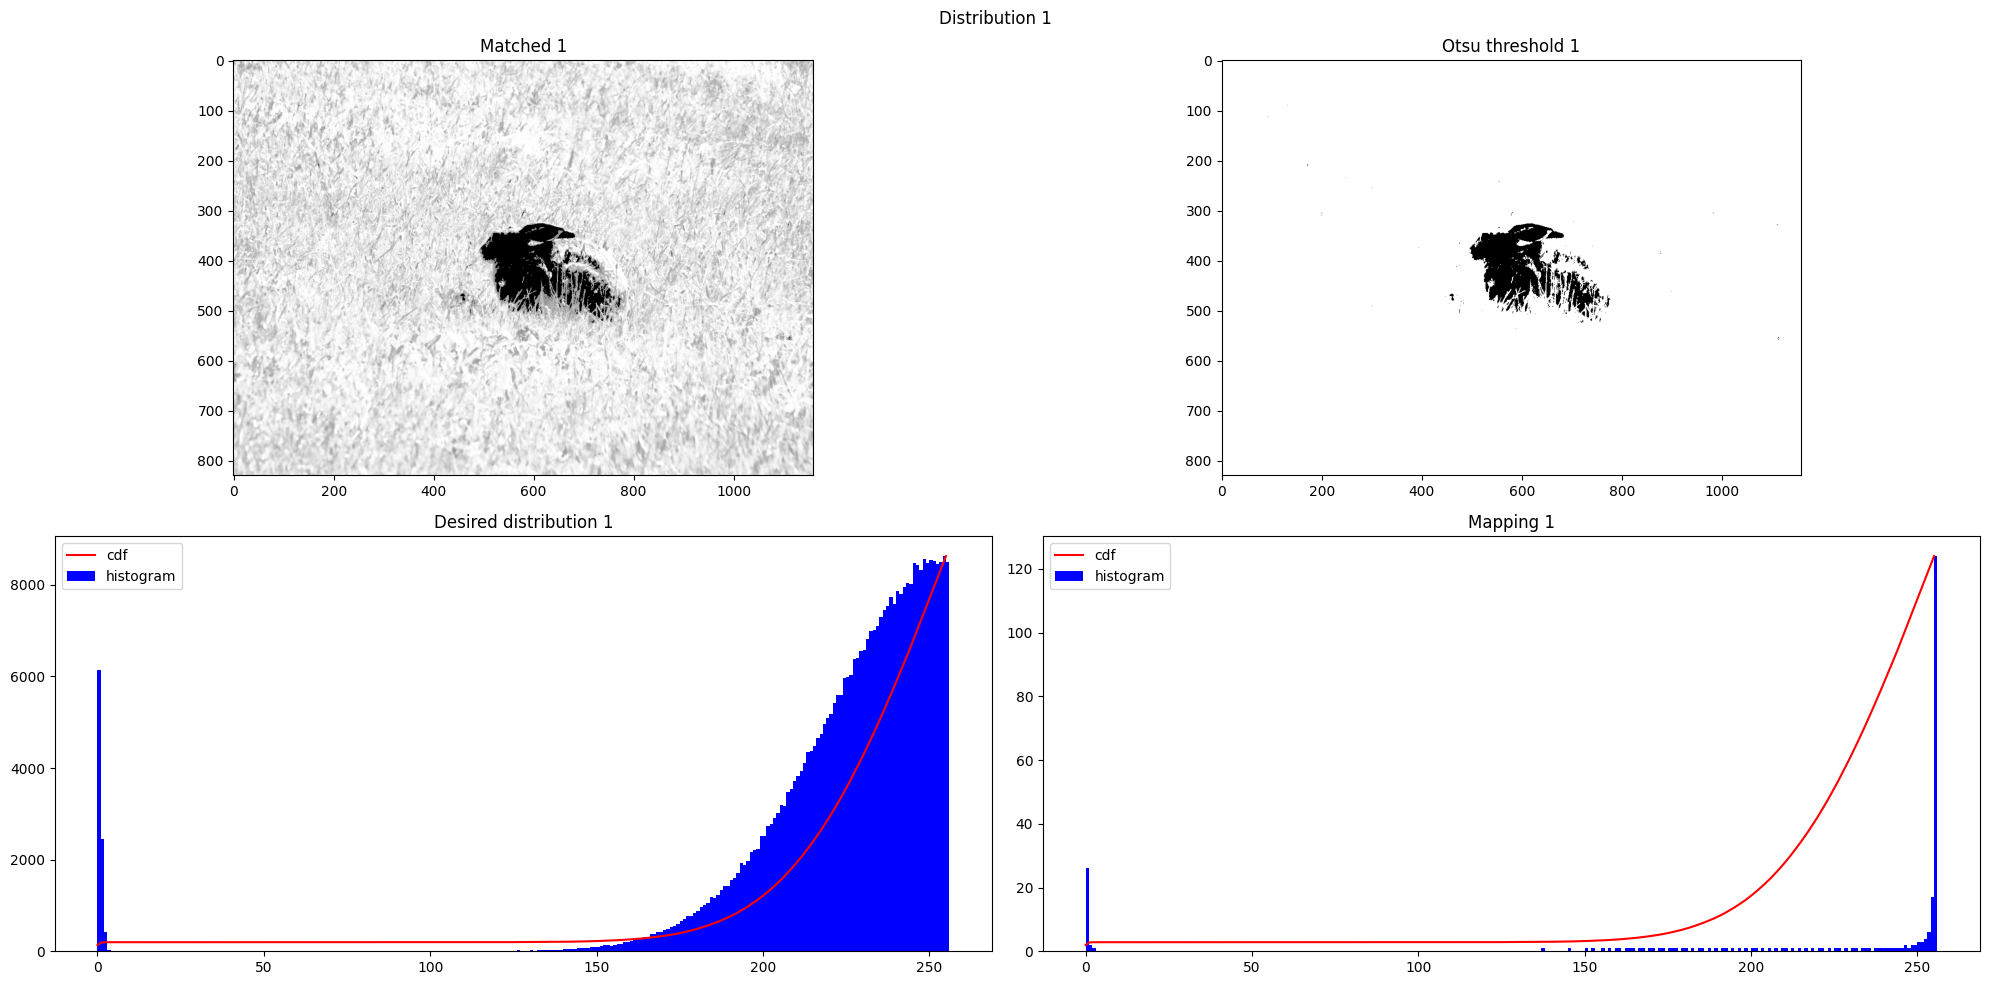

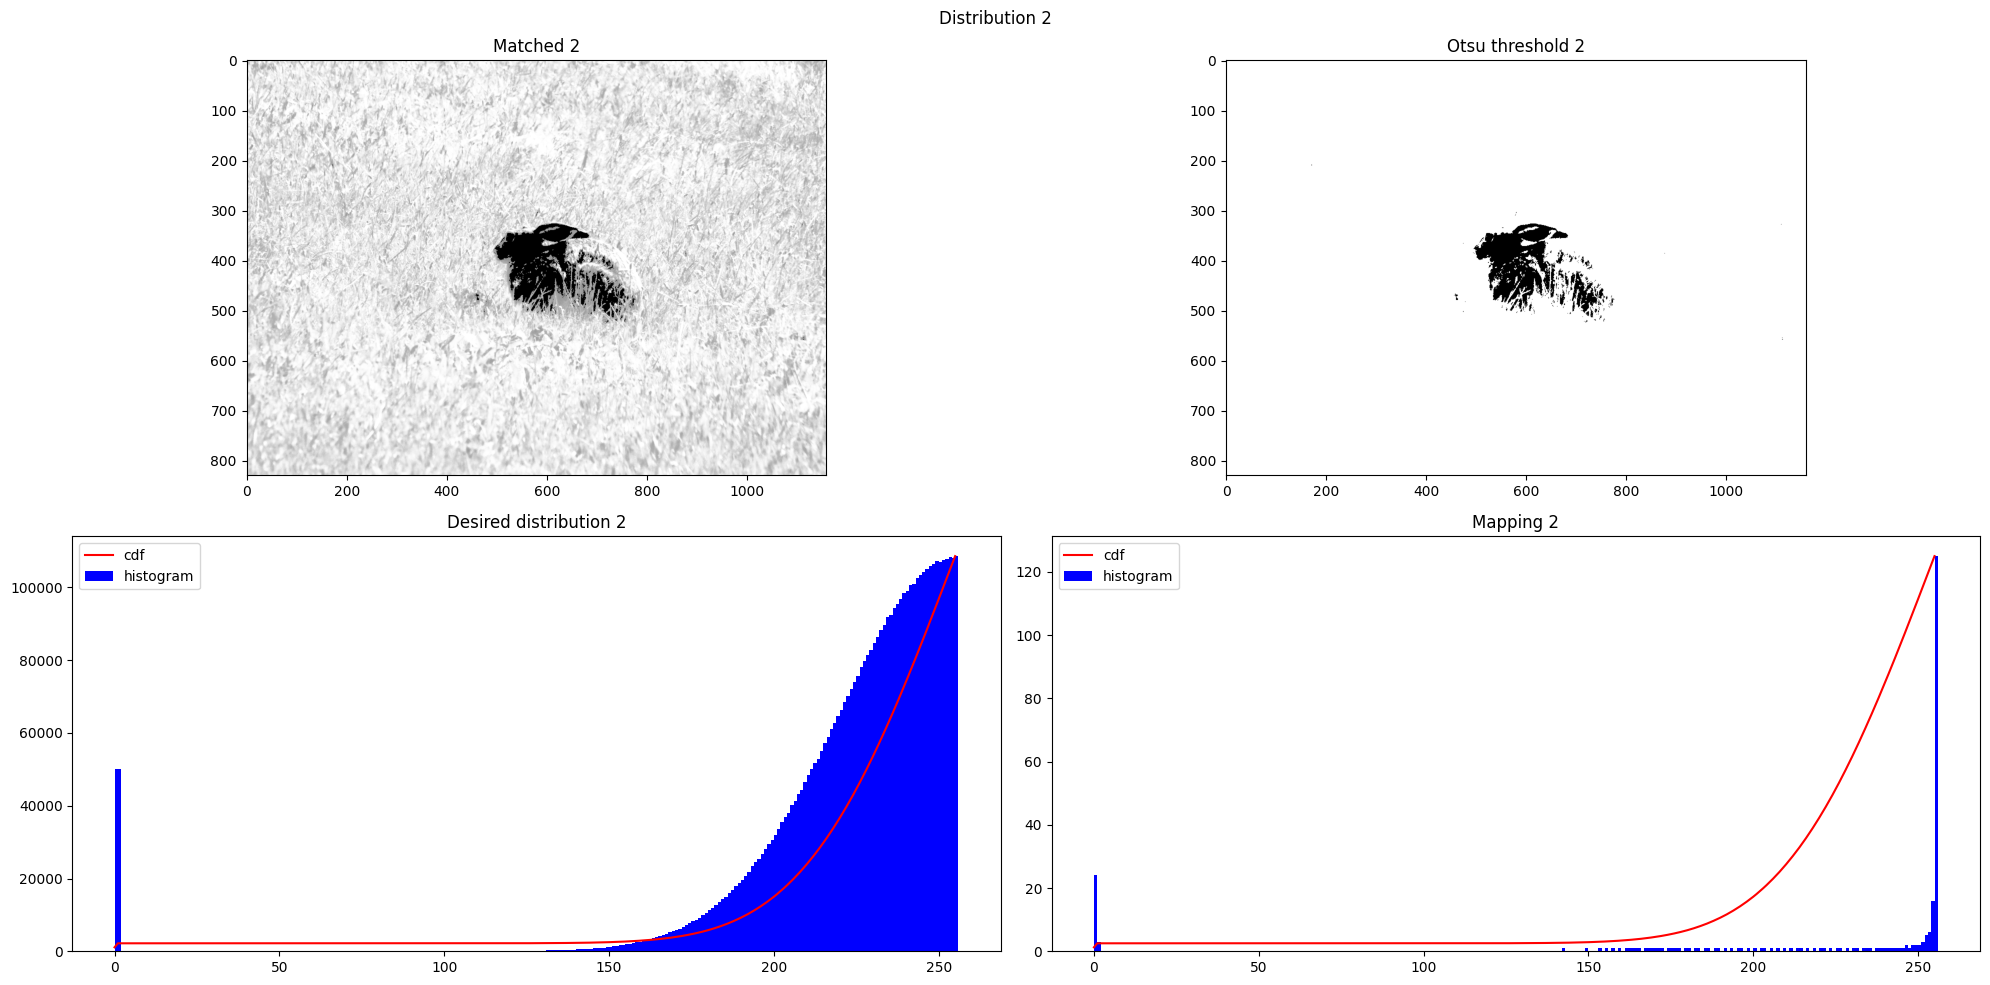

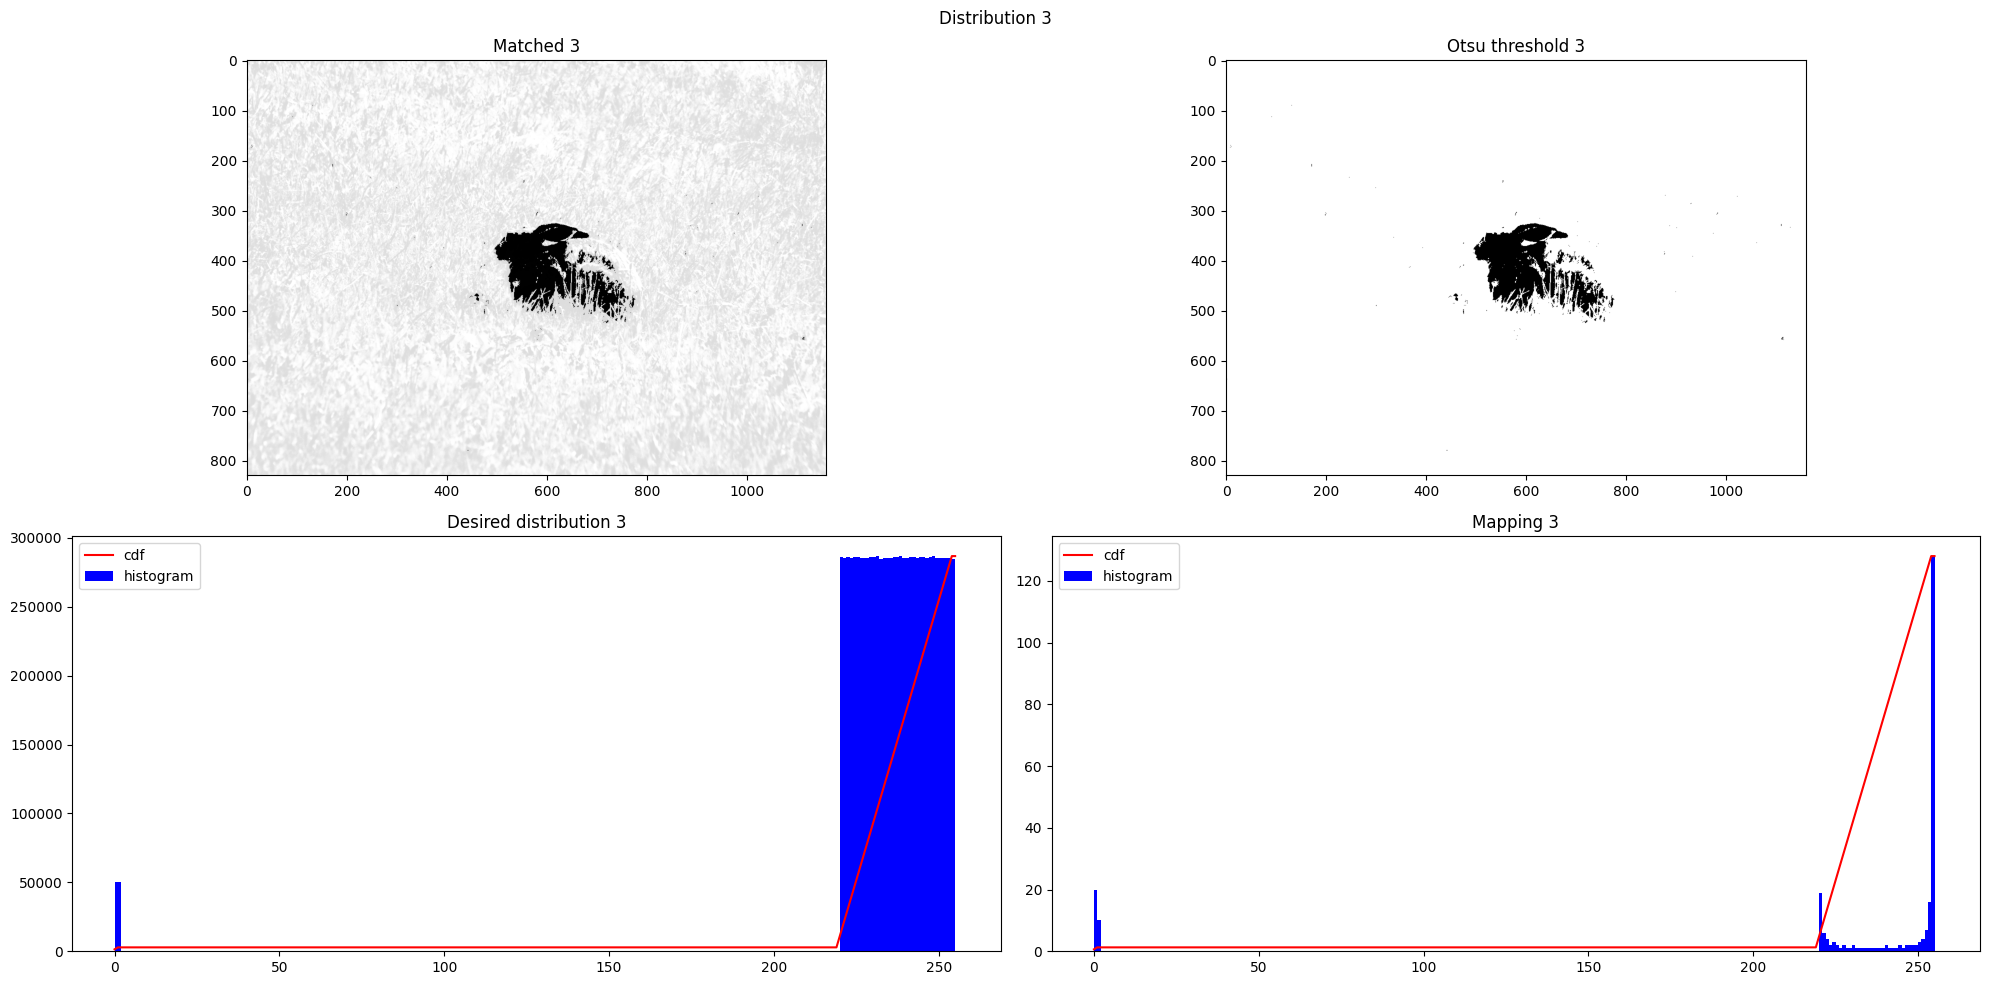

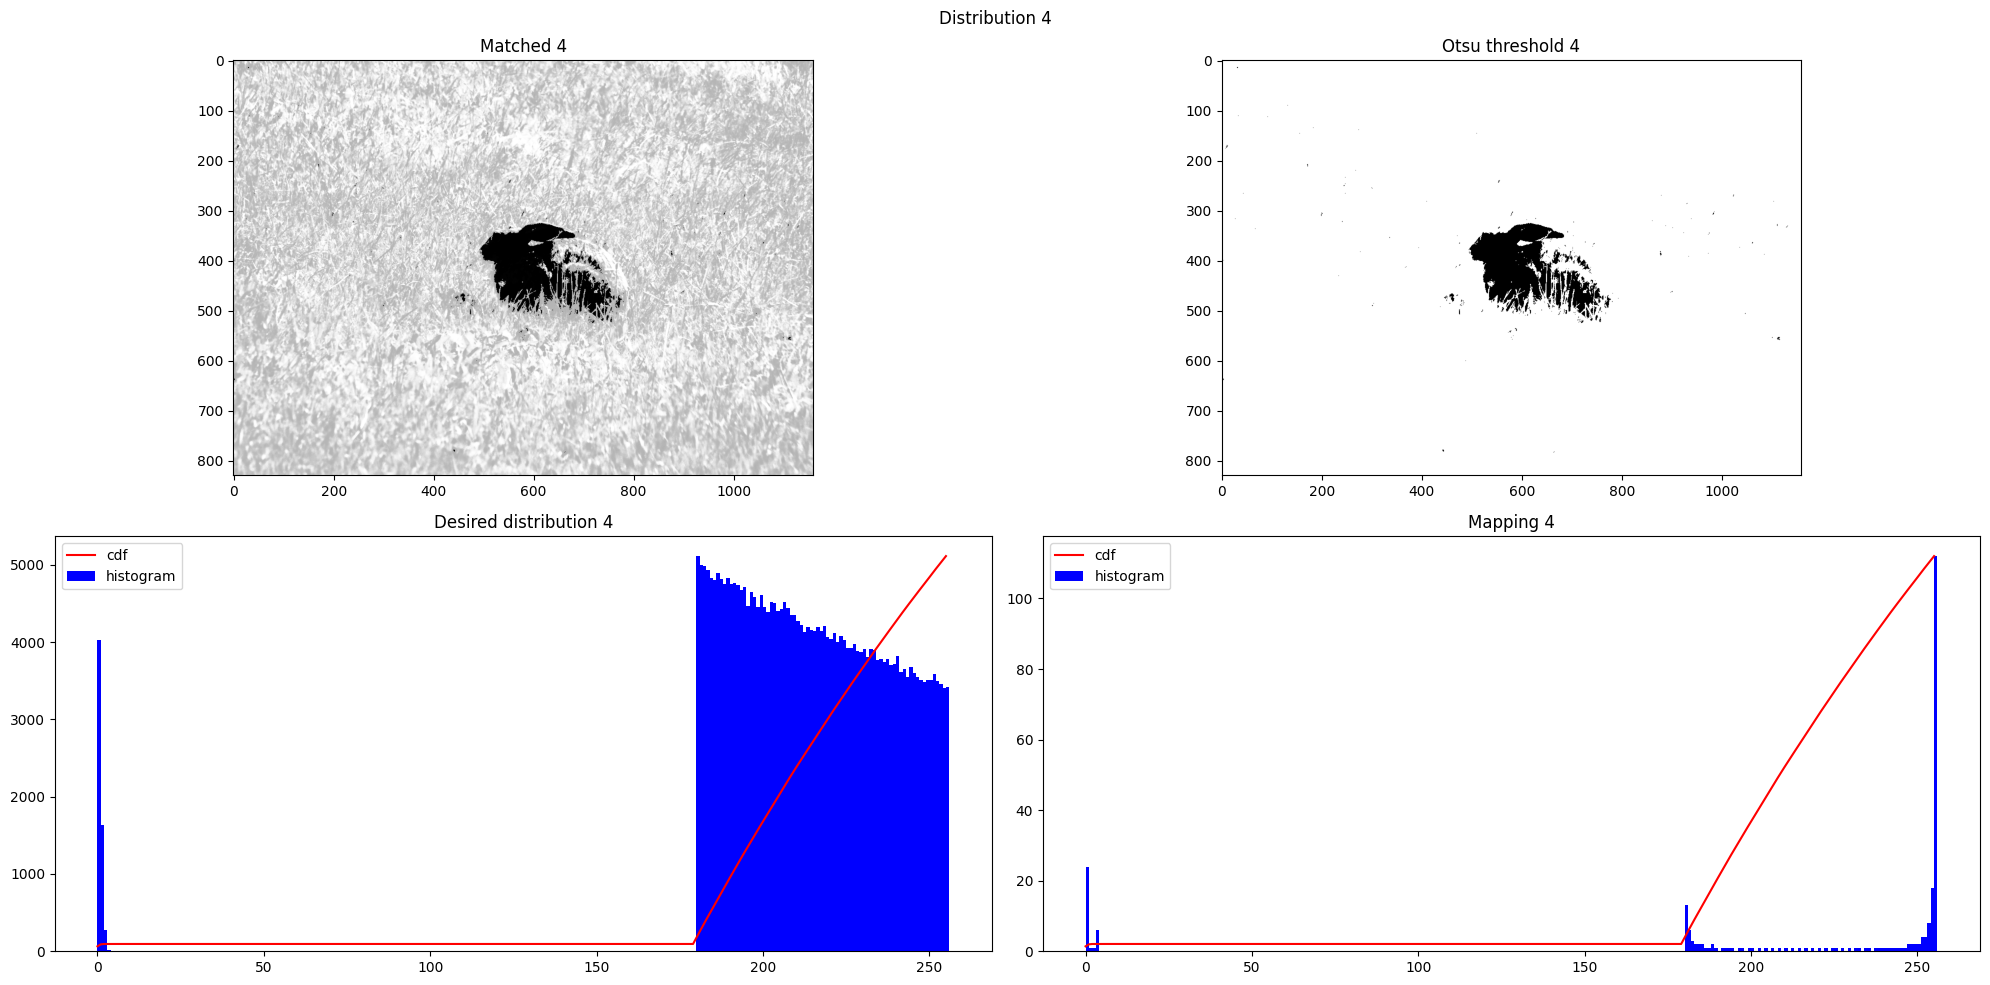

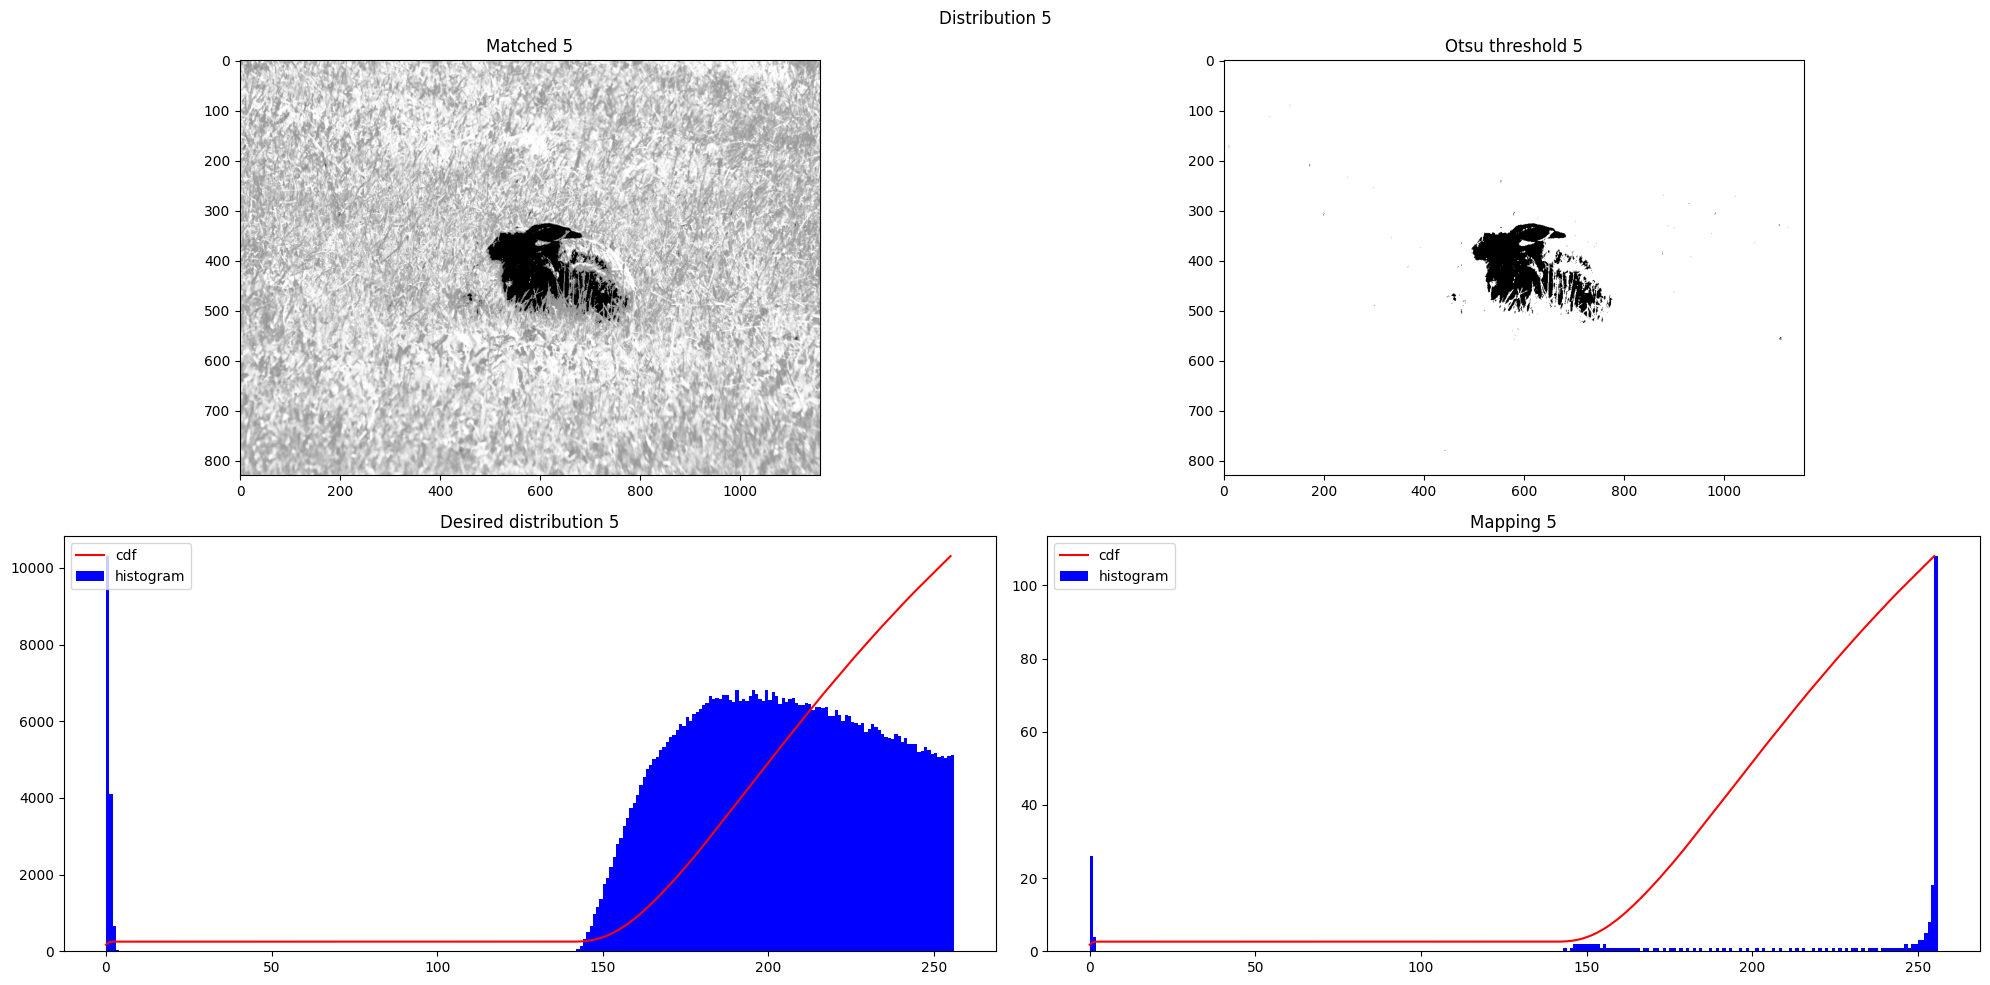

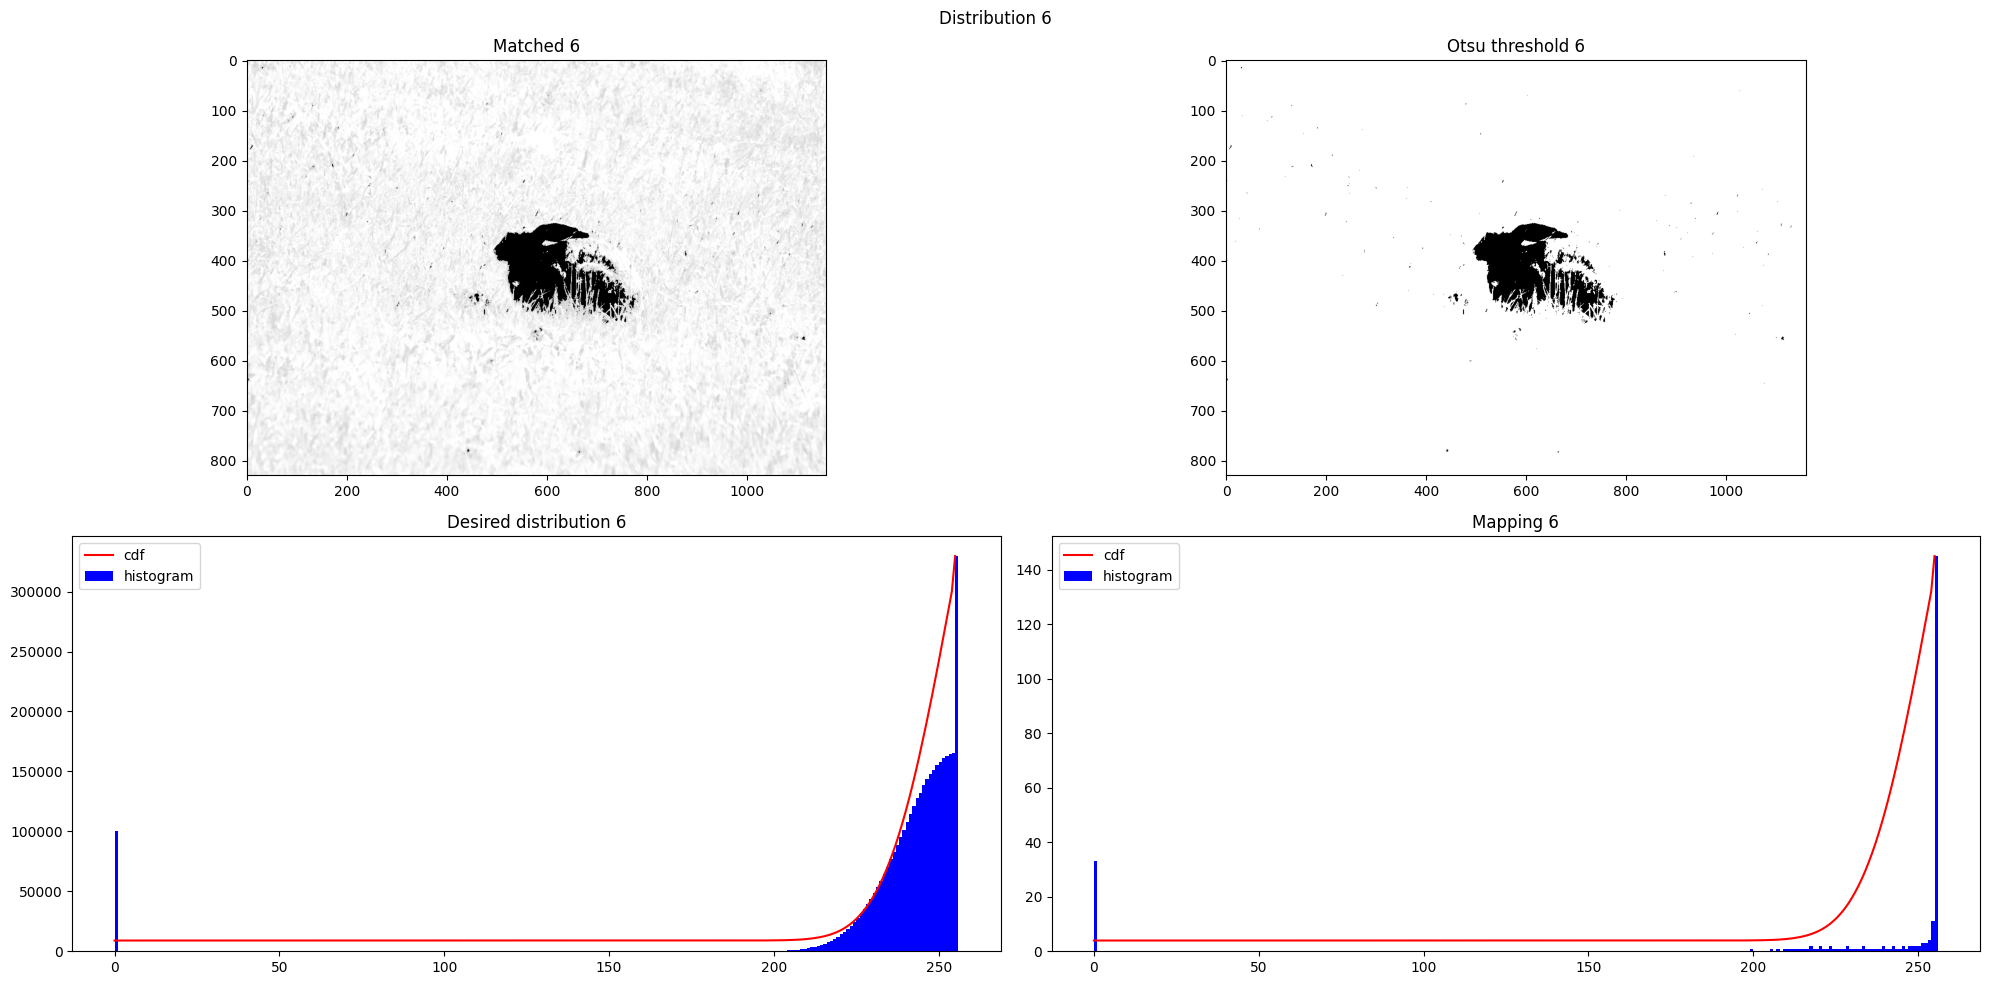

In [163]:
for i, desired_hist in enumerate(desired_hits):
    # Create a 3-row, 2-column subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    # Histogram and cumulative distribution function (CDF)
    hist, bins = np.histogram(desired_hist, 256, [0, 256])
    cdf = np.cumsum(hist / np.sum(hist))

    # Plot histogram and CDF in the first row
    axs[1, 0].hist(desired_hist, 256, [0, 256], color='b')
    axs[1, 0].plot(cdf * np.max(np.histogram(desired_hist, 256, [0, 256])[0]), color='r')
    axs[1, 0].legend(('cdf', 'histogram'), loc='upper left')
    axs[1, 0].set_title(f'Desired distribution {i + 1}')

    # Histogram matching
    hare_gray_matched, (mapping, result_cdf) = hist_match(hare_gray, hist)
    axs[0, 0].imshow(hare_gray_matched, cmap='gray')
    axs[0, 0].set_title(f'Matched {i + 1}')

    # Otsu's thresholding
    T, here_threshold = cv2.threshold(hare_gray_matched, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    axs[0, 1].imshow(here_threshold, cmap='gray')
    axs[0, 1].set_title(f'Otsu threshold {i + 1}')

    # Plot histogram of the mapping in the third row
    axs[1, 1].hist(mapping, 256, [0, 256], color='b')
    axs[1, 1].plot(result_cdf * np.max(np.histogram(mapping, 256, [0, 256])[0]), color='r')
    axs[1, 1].set_title(f'Mapping {i + 1}')
    axs[1, 1].legend(('cdf', 'histogram'), loc='upper left')

    # Adjust the layout
    fig.suptitle(f'Distribution {i + 1}')
    plt.tight_layout()
    plt.show()
